**TASK 4: Sales Prediction using Python**

*   Predict future sales based on factors like advertising spend, target segment and platform.
*   Prepare data through cleaning, transformation and feature selection.
*   Analyze how changes in advertising impact sales outcomes.
*   Deliver actionable insights for business marketing strategies.





In [9]:
# 1. Predict future sales based on factors like advertising  spend, target segment and platform.


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv('/content/Advertising.csv')


X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


new_data = pd.DataFrame({
    'TV': [150, 200, 120],
    'Radio': [30, 40, 20],
    'Newspaper': [20, 25, 10]
})

future_sales = model.predict(new_data)
print("\nPredicted Future Sales:")
for i, sale in enumerate(future_sales):
    print(f"Scenario {i+1}: {sale:.2f} units")



Mean Squared Error: 3.1740973539761033
R-squared: 0.899438024100912

Predicted Future Sales:
Scenario 1: 15.42 units
Scenario 2: 19.56 units
Scenario 3: 12.16 units


In [4]:
# 2. Prepare data through cleaning, transformation and feature selection.


import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression


data = pd.read_csv('/content/Advertising.csv')


np.random.seed(42)
data['Platform'] = np.random.choice(['Online', 'Offline'], size=len(data))
data['Segment'] = np.random.choice(['Youth', 'Adult', 'Senior'], size=len(data))


print("Missing values:\n", data.isnull().sum())
data.fillna(0, inplace=True)

numeric_features = ['TV', 'Radio', 'Newspaper']
categorical_features = ['Platform', 'Segment']

scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cat = encoder.fit_transform(data[categorical_features])
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_features))

X = pd.concat([data[numeric_features], encoded_cat_df], axis=1)
y = data['Sales']


selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print("\nFeature Scores:\n", feature_scores)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nPrepared X_train shape:", X_train.shape)
print("Prepared X_test shape:", X_test.shape)



Missing values:
 Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
Platform      0
Segment       0
dtype: int64

Feature Scores:
            Feature       Score
0               TV  312.144994
1            Radio   98.421588
2        Newspaper   10.887299
3  Platform_Online    3.890915
5    Segment_Youth    2.806579
4   Segment_Senior    1.001153

Prepared X_train shape: (160, 6)
Prepared X_test shape: (40, 6)


In [6]:
# 3. Use regression or time series models to forecast sales.

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv('/content/Advertising.csv')

np.random.seed(42)
data['Platform'] = np.random.choice(['Online', 'Offline'], size=len(data))
data['Segment'] = np.random.choice(['Youth', 'Adult', 'Senior'], size=len(data))

data.fillna(0, inplace=True)


numeric_features = ['TV', 'Radio', 'Newspaper']
categorical_features = ['Platform', 'Segment']

scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cat = encoder.fit_transform(data[categorical_features])
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_features))

X = pd.concat([data[numeric_features], encoded_cat_df], axis=1)
y = data['Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


new_data = pd.DataFrame({
    'TV': [150, 200, 120],
    'Radio': [30, 40, 20],
    'Newspaper': [20, 25, 10],
    'Platform': ['Online', 'Offline', 'Online'],
    'Segment': ['Youth', 'Adult', 'Senior']
})

new_data[numeric_features] = scaler.transform(new_data[numeric_features])

encoded_new = encoder.transform(new_data[categorical_features])
encoded_new_df = pd.DataFrame(encoded_new, columns=encoder.get_feature_names_out(categorical_features))

X_new = pd.concat([new_data[numeric_features], encoded_new_df], axis=1)

future_sales = model.predict(X_new)
for i, sale in enumerate(future_sales):
    print(f"Forecasted Sales for scenario {i+1}: {sale:.2f} units")


Mean Squared Error: 3.04
R-squared: 0.90
Forecasted Sales for scenario 1: 15.49 units
Forecasted Sales for scenario 2: 19.87 units
Forecasted Sales for scenario 3: 11.81 units


           Feature  Coefficient
0               TV     3.846347
1            Radio     2.815020
2        Newspaper     0.059830
3  Platform_Online    -0.041846
5    Segment_Youth    -0.171716
4   Segment_Senior    -0.580672


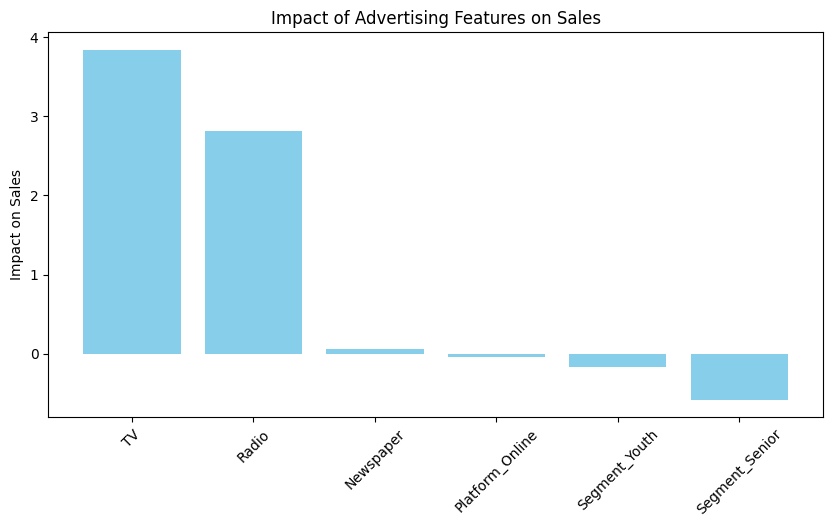

In [7]:
# 4. Analyse how changes in advertising impact sales outcome.

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Load Data
data = pd.read_csv('/content/Advertising.csv')

# Add example categorical features
np.random.seed(42)
data['Platform'] = np.random.choice(['Online', 'Offline'], size=len(data))
data['Segment'] = np.random.choice(['Youth', 'Adult', 'Senior'], size=len(data))

# Fill missing values
data.fillna(0, inplace=True)

# Feature preparation
numeric_features = ['TV', 'Radio', 'Newspaper']
categorical_features = ['Platform', 'Segment']

scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cat = encoder.fit_transform(data[categorical_features])
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_features))

X = pd.concat([data[numeric_features], encoded_cat_df], axis=1)
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression
model = LinearRegression()
model.fit(X_train, y_train)


coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coeff_df)



plt.figure(figsize=(10,5))
plt.bar(coeff_df['Feature'], coeff_df['Coefficient'], color='skyblue')
plt.xticks(rotation=45)
plt.ylabel('Impact on Sales')
plt.title('Impact of Advertising Features on Sales')
plt.show()


       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000
Sales         1.000000
TV            0.782224
Radio         0.576223
Newspaper     0.228299
Unnamed: 0   -0.051616
Name: Sales, dtype: float64


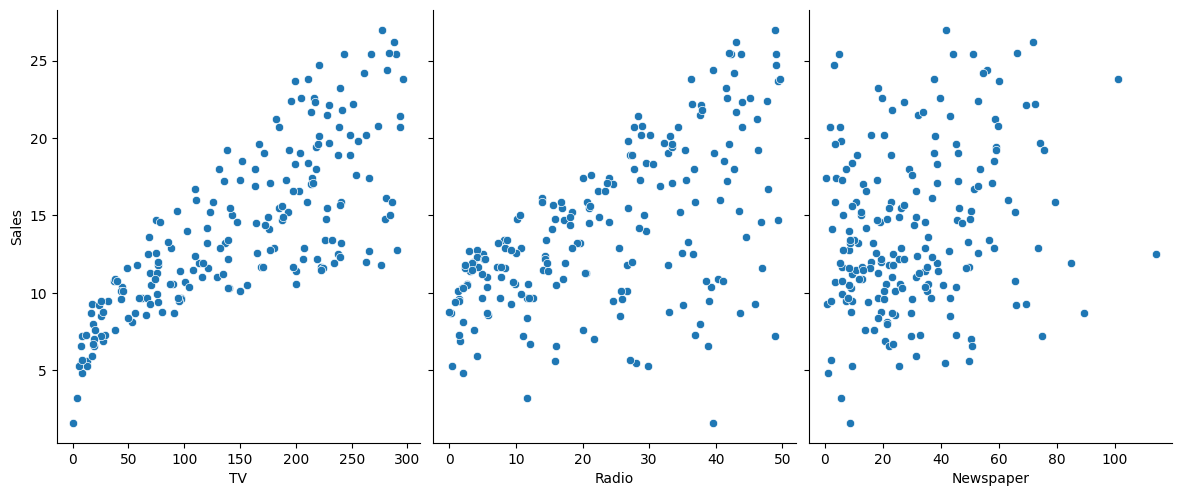

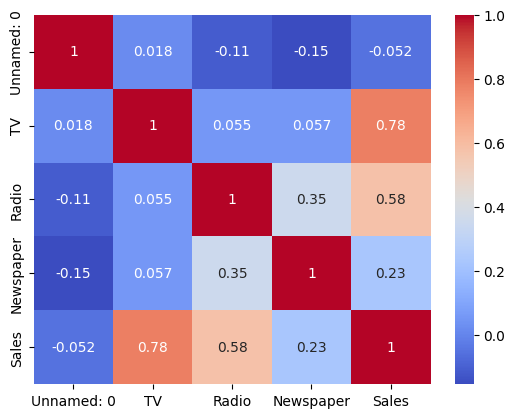

           Coefficient
TV            0.044730
Radio         0.189195
Newspaper     0.002761


In [8]:
# 5. Deliver actional insights for business marketing strategies.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


data = pd.read_csv('/content/Advertising.csv')


print(data.describe())


print(data.corr()['Sales'].sort_values(ascending=False))

sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=5, aspect=0.8, kind='scatter')
plt.show()

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()




X = data[['TV','Radio','Newspaper']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)
